<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 153.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 161.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 107.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 120.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 148.6 MB/s eta 0:00:00


##### Import Necessary Modules:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [5]:
## Write your code here
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [7]:
## Write your code here
# --- Identify Missing Values ---
print("--- Identifying Missing Values Across All Columns ---")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
# Filter to show only columns with missing values and sort by percentage
missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(
    by='Missing Percentage', ascending=False
)

if not missing_info.empty:
    print("Columns with Missing Values:")
    print(missing_info)
else:
    print("No missing values found in any column.")
print("---------------------------------------------------\n")

--- Identifying Missing Values Across All Columns ---
Columns with Missing Values:
                            Missing Count  Missing Percentage
AINextMuch less integrated          64289           98.245641
AINextLess integrated               63082           96.401119
AINextNo change                     52939           80.900714
AINextMuch more integrated          51999           79.464217
EmbeddedAdmired                     48704           74.428840
...                                   ...                 ...
YearsCode                            5568            8.508948
NEWSOSites                           5151            7.871693
LearnCode                            4949            7.563000
EdLevel                              4653            7.110656
AISelect                             4530            6.922689

[109 rows x 2 columns]
---------------------------------------------------



##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



--- Visualizing Missing Values with Heatmap ---


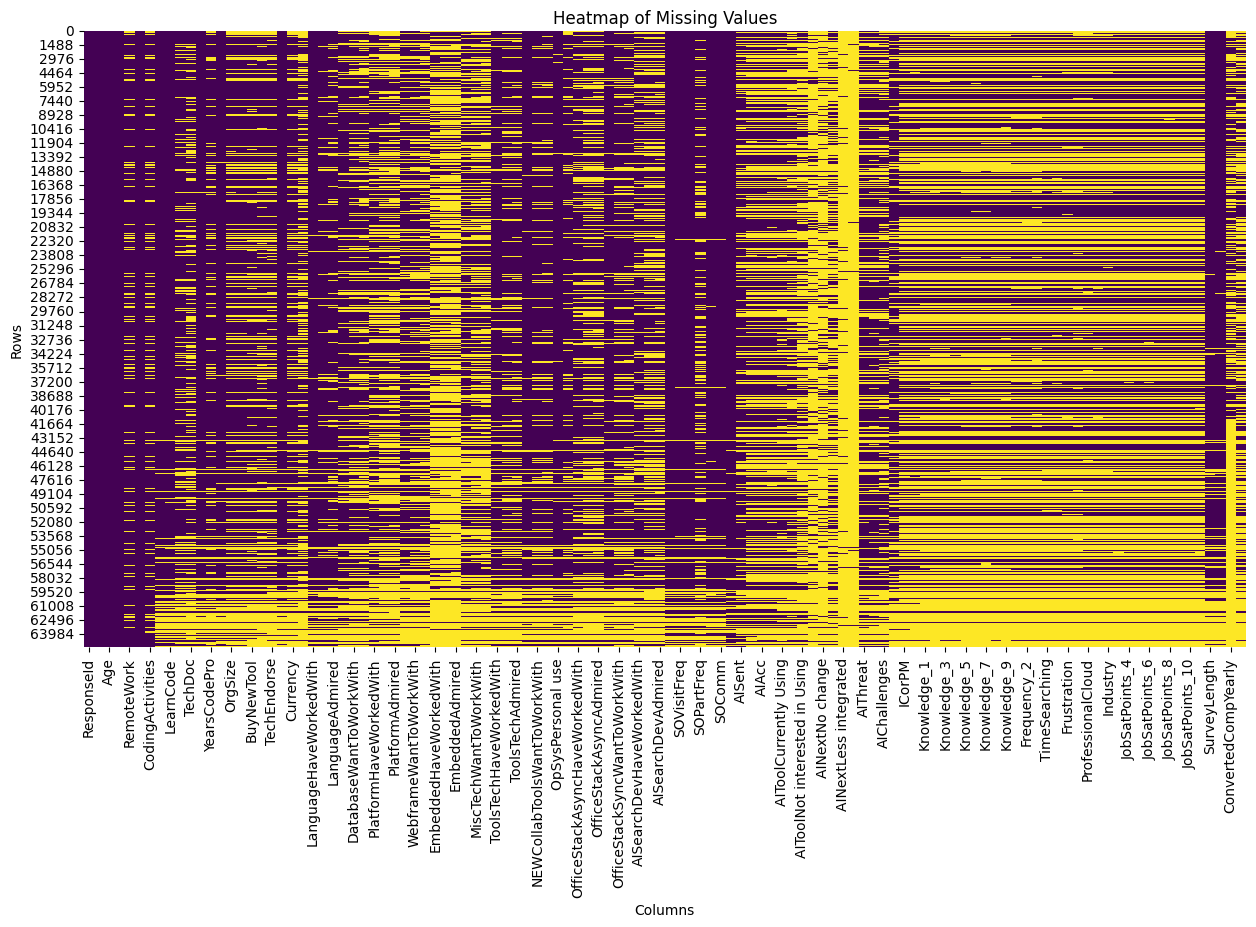

---------------------------------------------------



In [8]:
## Write your code here
# --- Visualize Missing Values using Heatmap ---
print("--- Visualizing Missing Values with Heatmap ---")
plt.figure(figsize=(15, 8))
# Create a heatmap of null values. True values (missing) will be one color, False (non-missing) another.
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') # 'viridis' is a good diverging colormap
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()
print("---------------------------------------------------\n")

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [9]:
## Write your code here
# --- Count Missing Values for a Specific Column (e.g., Employment) ---
specific_column = 'Employment' # You can change 'Employment' to any other column name
if specific_column in df.columns:
    missing_count_specific_column = df[specific_column].isnull().sum()
    print(f"Number of missing values in the '{specific_column}' column: {missing_count_specific_column}")
    print("---------------------------------------------------\n")
else:
    print(f"Column '{specific_column}' not found in the DataFrame.")

Number of missing values in the 'Employment' column: 0
---------------------------------------------------



### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [10]:
## Write your code here
# --- Identify Most Frequent Value in a Specific Column (e.g., Employment) ---
specific_column_mode = 'Employment' # You can change 'Employment' to any other column name
if specific_column_mode in df.columns:
    # Calculate the mode (most frequent value)
    # .mode()[0] is used because mode() can return multiple values if there's a tie
    most_frequent_value = df[specific_column_mode].mode()[0]
    print(f"Most frequent value in the '{specific_column_mode}' column: '{most_frequent_value}'")
    print("---------------------------------------------------\n")
else:
    print(f"Column '{specific_column_mode}' not found in the DataFrame. Cannot identify most frequent value.")

Most frequent value in the 'Employment' column: 'Employed, full-time'
---------------------------------------------------



##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [12]:
## Write your code here
column_to_impute_edlevel = 'EdLevel'
if column_to_impute_edlevel in df.columns:
    if df[column_to_impute_edlevel].isnull().sum() > 0:
        print(f"--- Imputing Missing Values in '{column_to_impute_edlevel}' ---")
        # Calculate the mode (most frequent value)
        mode_value_edlevel = df[column_to_impute_edlevel].mode()[0]
        print(f"Most frequent value (mode) for '{column_to_impute_edlevel}': '{mode_value_edlevel}'")

        # Impute missing values with the mode
        df[column_to_impute_edlevel].fillna(mode_value_edlevel, inplace=True)
        print(f"Missing values in '{column_to_impute_edlevel}' after imputation: {df[column_to_impute_edlevel].isnull().sum()}")
        print("---------------------------------------------------\n")
    else:
        print(f"No missing values found in '{column_to_impute_edlevel}'. No imputation performed.")
else:
    print(f"Column '{column_to_impute_edlevel}' not found in the DataFrame. Cannot perform imputation.")

# --- Impute Missing Values in 'Employment' with Mode ---
column_to_impute_employment = 'Employment'
if column_to_impute_employment in df.columns:
    if df[column_to_impute_employment].isnull().sum() > 0:
        print(f"--- Imputing Missing Values in '{column_to_impute_employment}' ---")
        # Calculate the mode (most frequent value)
        mode_value_employment = df[column_to_impute_employment].mode()[0]
        print(f"Most frequent value (mode) for '{column_to_impute_employment}': '{mode_value_employment}'")

        # Impute missing values with the mode
        df[column_to_impute_employment].fillna(mode_value_employment, inplace=True)
        print(f"Missing values in '{column_to_impute_employment}' after imputation: {df[column_to_impute_employment].isnull().sum()}")
        print("---------------------------------------------------\n")
    else:
        print(f"No missing values found in '{column_to_impute_employment}'. No imputation performed.")
else:
    print(f"Column '{column_to_impute_employment}' not found in the DataFrame. Cannot perform imputation.")

--- Imputing Missing Values in 'EdLevel' ---
Most frequent value (mode) for 'EdLevel': 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
Missing values in 'EdLevel' after imputation: 0
---------------------------------------------------

No missing values found in 'Employment'. No imputation performed.


/tmp/ipykernel_300/2421987700.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_to_impute_edlevel].fillna(mode_value_edlevel, inplace=True)


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


In [ ]:
## Write your code here

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
